<h1 style='text-align:center'> Growth of Kpop in Korea Based on Melon Monthly Chart </h1>

<img src='melon.png'>

<p> Melon is the biggest streaming platform in korea and they release a daily,weekly and monthly chart to show what songs people are listening to the most on the platform. Kpop as taking the world by storm and has now become a major music genre around the world but it wasn't always such a big genre. Prior to 2017 Kpop was the 3rd and sometimes 4th most consumed genre in South Korea but now it's fighting for the number 1 position when it comes to consumption. Kpop is now a $10 billion industry and the marketshare has been increasing globally.</p>
</n>
<p> This analysis will focus on looking at the top 200 songs in korea each month over the past 13 years and seeing which artists have led the new wave of global domination through kpop</p>
</n>
<h3 style='text-align:center'> Questions That Will Be Asked</h3>
</n>

1. Which artists had the most songs on the Melon 200 chart from 2010 till 2013?
2. Which artist has the most number 1 songs on Melon chart?
3. Which Korean song spent the longest time at the number 1 position?
4. Which song charted the longest in the Melon 200?
5. Which artists are the new leaders of kpop in South Korea?



In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
f = [f.name for f in fm.fontManager.ttflist]
plt.rc('font', family='Apple SD Gothic Neo')
%matplotlib inline

In [2]:
os.getcwd()

'/Users/sandraofili'

In [3]:
with open('kpop_rankings.csv') as file:
    kpop_df = pd.read_csv(file)

In [4]:
kpop_raw_df = kpop_df.copy()

In [5]:
kpop_raw_df

,year,time,rank,song_title,artist,album
0,2010,1,1,우리 사랑하게 됐어요.,"가인, 조권",우리 사랑하게 됐어요
1,2010,1,2,처음처럼 그때처럼 (Feat. 강민경),이승기,Shadow (Repackage)
2,2010,1,3,그대라서,거미,크리스마스에 눈이 올까요? OST
3,2010,1,4,Bo Peep Bo Peep,티아라 (T-ara),Absolute First Album
4,2010,1,5,술 한잔 해요,지아 (Zia),Atelier
...,...,...,...,...,...,...
66695,2023,44,196,BETELGEUSE,Yuuri,BETELGEUSE
66696,2023,44,197,Vancouver,BIG Naughty (서동현),Lovey Dovey
66697,2023,44,198,Bye bye my blue,백예린,Bye bye my blue
66698,2023,44,199,사랑이라 믿었던 것들은 (Feat. 이수현),BIG Naughty (서동현),호프리스 로맨틱


<h3 style='text-align:center'> Data Preparation and Cleaning</h3>

<p>Now I am going to focus on cleaning the data by removing rows with empty values or incorrect values, making sure each column has only 1 data type and removing all irrelevant data</p>

In [6]:
kpop_raw_df.year.unique() #The year column has no out of place values and has exactly 13 unique values

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023])

In [7]:
kpop_raw_df.time.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

<p> A year has 52 weeks but some values have 53 weeks which can cause the data to be incorrect. Melon releases their monthly chart on the 1st day of each month and based on the day the 1st falls on some years can have 53 while others have 52 weeks. For the most accuracy I remove data for all rows of data submited for the 53rd week </p>

In [8]:
kpop_raw_df = kpop_raw_df.drop(kpop_raw_df[kpop_raw_df.time == 53].index)

In [9]:
kpop_raw_df.describe() # now the max value for time is 52 and no longer 53

,year,time,rank
count,66600.000000,66600.000000,66600.000000
mean,2018.406907,25.741742,80.680180
std,4.207263,14.905196,54.226091
min,2010.000000,1.000000,1.000000
25%,2016.000000,13.000000,36.000000
50%,2020.000000,26.000000,72.000000
75%,2022.000000,38.000000,118.000000
max,2023.000000,52.000000,200.000000


In [10]:
kpop_raw_df.isna().sum() #checking for any values with nan or empty space

year          0
time          0
rank          0
song_title    0
artist        0
album         0
dtype: int64

In the 'artist' column there are some places where the artist appears more than once due to featuring. I will remove these values and replace them with nan because I only want information on songs the artist was the main and not a featured artist.

In [11]:
kpop_raw_df.where(~(kpop_raw_df.artist.str.contains(';', na=False)), np.nan, inplace=True)

In [12]:
kpop_raw_df

,year,time,rank,song_title,artist,album
0,2010,1,1,우리 사랑하게 됐어요.,"가인, 조권",우리 사랑하게 됐어요
1,2010,1,2,처음처럼 그때처럼 (Feat. 강민경),이승기,Shadow (Repackage)
2,2010,1,3,그대라서,거미,크리스마스에 눈이 올까요? OST
3,2010,1,4,Bo Peep Bo Peep,티아라 (T-ara),Absolute First Album
4,2010,1,5,술 한잔 해요,지아 (Zia),Atelier
...,...,...,...,...,...,...
66695,2023,44,196,BETELGEUSE,Yuuri,BETELGEUSE
66696,2023,44,197,Vancouver,BIG Naughty (서동현),Lovey Dovey
66697,2023,44,198,Bye bye my blue,백예린,Bye bye my blue
66698,2023,44,199,사랑이라 믿었던 것들은 (Feat. 이수현),BIG Naughty (서동현),호프리스 로맨틱


<h3 style='text-align:center'> Data Analysis and Visualization</h3>

<h4 style='text-align:center'>1. Which artists had the most songs on the Melon 200 chart from 2010 till 2013?</h4>

In [13]:
nums = kpop_raw_df.groupby('artist')['song_title'].nunique()

In [14]:
no_songs= nums.sort_values(ascending=False).head(10)
print(no_songs)

artist
EXO                 106
방탄소년단               101
아이유 (IU)             83
세븐틴                  73
태연 (TAEYEON)         70
레드벨벳(Red Velvet)     68
샤이니 (SHINee)         60
소녀시대                 56
비투비 (BTOB)           56
NCT DREAM            52
Name: song_title, dtype: int64


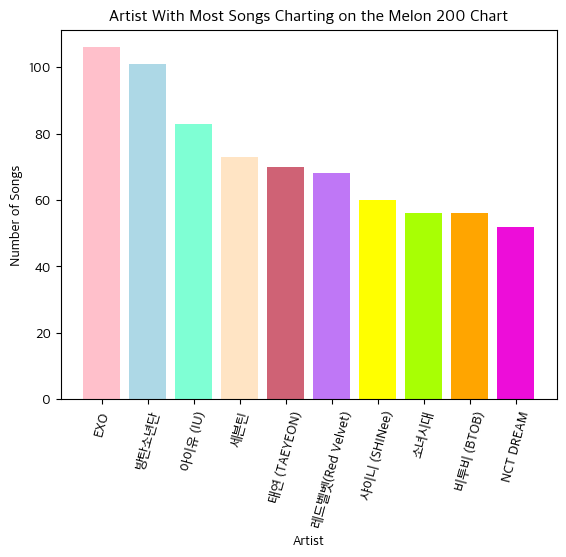

In [15]:
color = ['pink','lightblue', '#7FFFD4', '#FFE4C4', '#cf6275', '#bf77f6','yellow','#a8ff04','orange','#ed0dd9']
fig, ax = plt.subplots()
ax.bar(no_songs.index, no_songs, color= color)
ax.set_title('Artist With Most Songs Charting on the Melon 200 Chart')
ax.set_ylabel('Number of Songs')
y =ax.set_xlabel('Artist')
g =plt.xticks(rotation=75)

<h4 style='text-align:center'>2. Which artist has the most number 1 songs on Melon chart? </h4>

In [16]:
most_num1 = kpop_raw_df.loc[kpop_raw_df['rank'] == 1]

In [17]:
mostnum1 = most_num1.groupby('artist')['song_title'].nunique().sort_values(ascending=False).head(10)
print(mostnum1)

artist
아이유 (IU)        16
BIGBANG (빅뱅)     8
TWICE            6
소녀시대             6
임영웅              6
IVE (아이브)        5
방탄소년단            5
지코 (ZICO)        5
2NE1 (투애니 원)     5
다비치              4
Name: song_title, dtype: int64


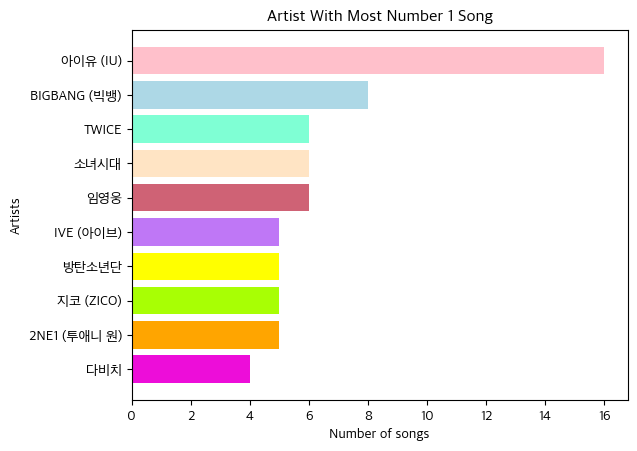

In [18]:
color = ['pink','lightblue', '#7FFFD4', '#FFE4C4', '#cf6275', '#bf77f6','yellow','#a8ff04','orange','#ed0dd9']
fig, ax = plt.subplots()
ax.barh(mostnum1.index, mostnum1, color= color)
ax.invert_yaxis()
ax.set_title('Artist With Most Number 1 Song')
ax.set_ylabel('Artists')
y =ax.set_xlabel('Number of songs')


IU has the most number 1 songs on the Melon chart. IU is also considered one of the biggest musicians in South Kore by the general public.

<h4 style='text-align:center'>3. Which Korean song spent the longest time at the number 1 position? </h4>

In [19]:
num1_rankings = kpop_raw_df.loc[kpop_raw_df['rank'] == 1] #Looking for all songs that ranked number 1

In [20]:
all_time_num1 = num1_rankings.groupby('song_title').size().sort_values(ascending=False).head(10) 
print(all_time_num1)

song_title
Ditto                                     12
Dynamite                                  11
Super Shy                                  8
VVS (Feat. JUSTHIS) (Prod. GroovyRoom)     7
아무노래                                       7
Stay                                       6
사건의 지평선                                    6
Celebrity                                  6
Love Lee                                   6
I AM                                       6
dtype: int64


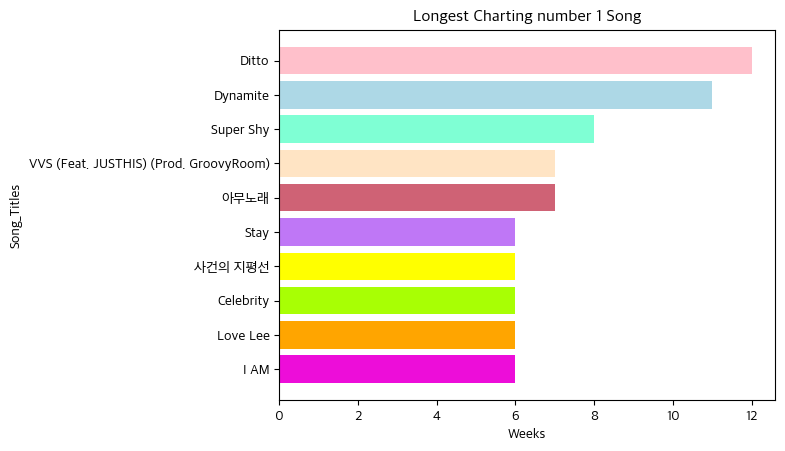

In [21]:
#ploting a horizontal bar graph
color = ['pink','lightblue', '#7FFFD4', '#FFE4C4', '#cf6275', '#bf77f6','yellow','#a8ff04','orange','#ed0dd9']
fig, ax = plt.subplots()
ax.barh(all_time_num1.index, all_time_num1, color= color)
ax.invert_yaxis()
ax.set_title('Longest Charting number 1 Song')
ax.set_ylabel('Song_Titles')
y =ax.set_xlabel('Weeks')


From the graph we can see that Ditto by New Jeans is the longest charting number 1 song. It spent 12 weeks at number 1 on the Melon Chart.

<h4 style='text-align:center'> 4. Which song charted the longest in the Melon 200?</h4>

In [22]:
no_occurance_df = kpop_raw_df.groupby(['song_title']).size() #Grouping song titles to see how many times each song appears


In [23]:
no_occurance = no_occurance_df.sort_values(ascending= False).head(10)
print(no_occurance)

song_title
봄날                                       248
밤편지                                      243
Shape of You                             230
Love Yourself                            225
모든 날, 모든 순간 (Every day, Every Moment)    201
2002                                     200
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지                200
주저하는 연인들을 위해                             199
Bad                                      187
이제 나만 믿어요                                187
dtype: int64


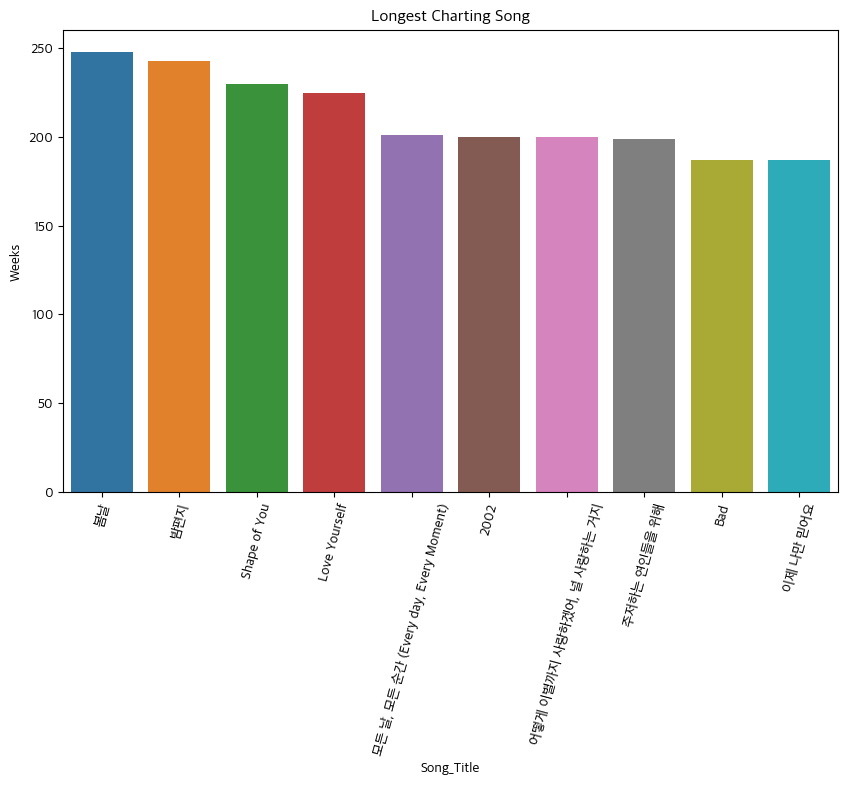

In [24]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
bars = sb.barplot(x= no_occurance.index, y= no_occurance)
BAR = bars.set(xlabel = 'Song_Title', ylabel ='Weeks', title ='Longest Charting Song')

The  Top 10 songs with the most weeks in the top 200 Melon Chart are:

          
    1. 방탄소년단 (BTS)          봄날(Spring Day)                              248
    2. 아이유 (IU)              밤편지(Through The Night)                      243
    3. Ed Sheeran             Shape of You                                 230
    4. Justin Bieber          Love Yourself                                225
    5. 폴킴(Paul Kim)          모든 날, 모든 순간 (Every day, Every Moment)     201
    6. Anne-Marie             2002                                         200
    7. AKMU (악뮤)             어떻게 이별까지 사랑하겠어, 널 사랑하는 거지(How can I) 200
    8. 잔나비 (Janabi)          주저하는 연인들을 위해 (For lovers who hesitate)  199
    9. 임영웅 (Lee Youngwoong)  이제 나만 믿어요 (Trust in Me)                   187
    10. 아이유 (IU)              Blueming                                    184

<h4 style='text-align:center'>5. Which artists are the new leaders of kpop in South Korea?</h4>

For this question we are going to focus on the 2023 charts and look at which artists dominated the Melon charts in 2023. We will look at number of unique entries in the chart,highest ranking on the chart and total number of times a song of theirs appeared on the chart in 2023. Once we have all three information we will then calculate a percentage and pick the possible Top 3 New leaders of Kpop in South Korea.

We use the term possible because some big groups like BTS are currently on hiatus due to compulsory military service so they were not able to release new music and promote in 2023. This analysis will focus on who led 2023 and their potential to continue their momentum in 2024.

In [34]:
leaders_2023 = kpop_raw_df.loc[kpop_raw_df['year'] == 2023]

In [35]:
leaders_2023


,year,time,rank,song_title,artist,album
57900,2023,1,1,Ditto,NewJeans,`OMG`
57901,2023,1,2,사건의 지평선,윤하,6th Album Repackage `END THEORY : Final Edition`
57902,2023,1,3,OMG,NewJeans,`OMG`
57903,2023,1,4,Hype boy,NewJeans,1st EP `New Jeans`
57904,2023,1,5,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3
...,...,...,...,...,...,...
66695,2023,44,196,BETELGEUSE,Yuuri,BETELGEUSE
66696,2023,44,197,Vancouver,BIG Naughty (서동현),Lovey Dovey
66697,2023,44,198,Bye bye my blue,백예린,Bye bye my blue
66698,2023,44,199,사랑이라 믿었던 것들은 (Feat. 이수현),BIG Naughty (서동현),호프리스 로맨틱


In [172]:
#Artist with the most songs appearing on the 200 chart in 2023
leaders = leaders_2023.groupby('artist')['song_title'].nunique().sort_values(ascending=False).head(10) 

In [173]:
#Artist with highest ranking songs in 2023

num1_2023 = leaders_2023.loc[leaders_2023['rank'] ==1]
top1= num1_2023.groupby('artist')['rank'].sum().sort_values(ascending=False)
top1_percentage=round(top1/len(num1_2023) * 100)
#New Jeans held the Number 1 spot for 19 weeks in 2023
#2023 data is not complete. only 44 weeks were included in this data set

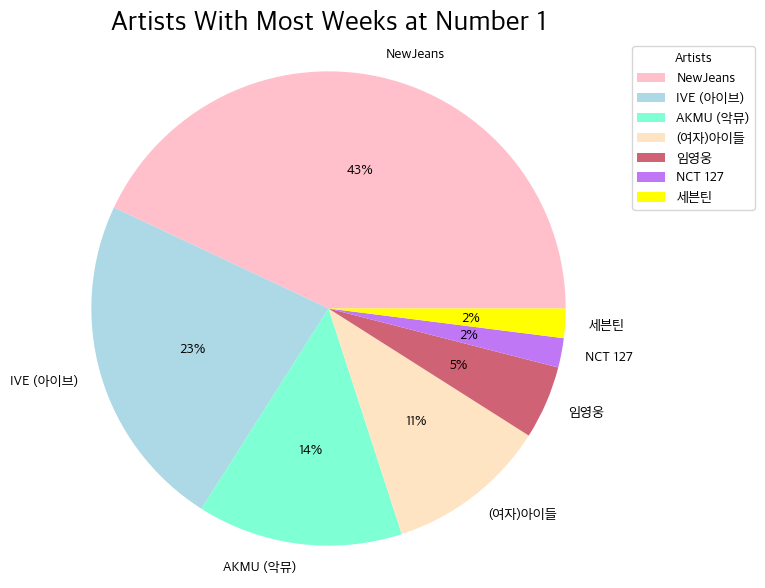

In [174]:
fig = plt.figure(figsize=(10, 7), facecolor='White')
plt.pie(top1_percentage,colors =color, labels=top1_percentage.index, autopct='%.0f%%', radius=1.1)
plt.title('Artists With Most Weeks at Number 1',fontsize=20)
plt.legend(labels=top1_percentage.index,title='Artists', bbox_to_anchor=(1.05,1))

In [175]:
top_artists = pd.merge(leaders_2023,top1, on='artist') #Merging the 2 new tables

In [176]:
top_artists

,year,time,rank_x,song_title,artist,album,rank_y
0,2023,1,1,Ditto,NewJeans,`OMG`,19
1,2023,1,3,OMG,NewJeans,`OMG`,19
2,2023,1,4,Hype boy,NewJeans,1st EP `New Jeans`,19
3,2023,1,9,Attention,NewJeans,1st EP `New Jeans`,19
4,2023,1,16,Cookie,NewJeans,1st EP `New Jeans`,19
...,...,...,...,...,...,...,...
1553,2023,44,130,Diamond Days,세븐틴,11th Mini Album `SEVENTEENTH HEAVEN`,1
1554,2023,44,132,Monster,세븐틴,11th Mini Album `SEVENTEENTH HEAVEN`,1
1555,2023,44,144,Back 2 Back,세븐틴,11th Mini Album `SEVENTEENTH HEAVEN`,1
1556,2023,44,153,하품,세븐틴,11th Mini Album `SEVENTEENTH HEAVEN`,1


In [238]:
total_appearance=top_artists.groupby('artist').size().sort_values(ascending=False).head(10).to_frame('total_appearance')


In [239]:
total_appearance

,total_appearance
artist,
임영웅,632
NewJeans,341
IVE (아이브),243
(여자)아이들,145
AKMU (악뮤),96
세븐틴,80
NCT 127,21


  <h4> Dividing the amount of unique songs each artist that had a number 1 song had by the total number of weeks of data available for Melon 200 chart 2023</h4> 

In [241]:
total_pos_apperance = (leaders * 44).to_frame('total_possible_appearance') #44 is total number of weeks in 2023 that was available for analysis
#Total Number of possible appearance on the chart

In [242]:
total_pos_apperance

,total_possible_appearance
artist,
IVE (아이브),792
임영웅,748
NCT DREAM,748
LE SSERAFIM (르세라핌),660
세븐틴,660
NewJeans,616
정국,572
투모로우바이투게더,484
아이유 (IU),484


In [264]:
appearance = pd.merge(total_appearance,total_pos_apperance,on='artist')
appearance

,total_appearance,total_possible_appearance
artist,,
임영웅,632,748
NewJeans,341,616
IVE (아이브),243,792
세븐틴,80,660


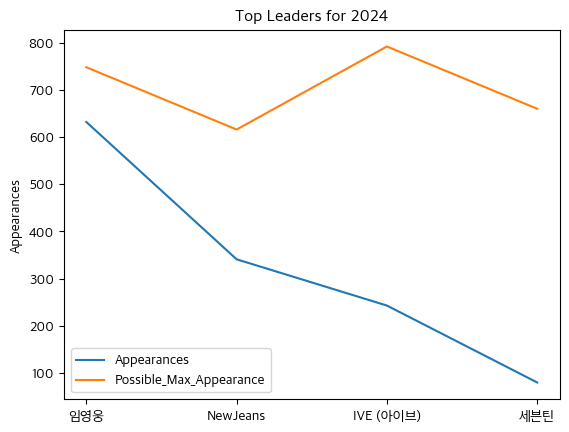

In [286]:
plt.plot(appearance)
plt.ylabel('Appearances')
plt.title('Top Leaders for 2024')
y=plt.legend(['Appearances','Possible_Max_Appearance'])

From the Graph we can see the 4 possible leaders of 2024 with Lim Young Woong leading the batch. Based on research done these 4 artists are considered the top artists leading charts in South Korea right now. During Award shows such as the Melon Music Awards these 4 artists won multiple awards and are seen to continue to grow in 2024 while the biggest artist in South Korea undergo their mandatory military service.

<h3 style='text-align:center'>Conclusion</h3>

We've drawn many conclusions from the analysis, heres a brief summary:

<li>Artists such as Lim Young Woong, New Jeans, Ive and Seventeen will possibly continue to lead on the music charts in South Korea.

<li>IU leads when it comes to artists with the most number 1 songs in South Korea, while BTS continue to lead as the artist with the longest charting number song.

<li>New Jeans and BTS battled it out for longest running Number 1 song with New Jeans coming out on top and BTS are close second.

<li>From all these analysis we can infer that IU and BTS led the way for a long time and now Lim Young Woong and New Jeans are the new leaders of kpop